# Imports

In [1]:
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

2023-12-19 12:17:18.114934: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 12:17:18.267351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 12:17:18.267386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 12:17:18.292378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 12:17:18.344211: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import importlib
import data_loading
import data_processing

importlib.reload(data_loading)
importlib.reload(data_processing)

from data_loading import load_dataset, create_input_space, augment_data
from data_processing import preprocess_signals, plot_signal_samples

In [3]:
data = load_dataset(signal_names=['ecg', 'gsr'])

In [4]:
print(len(data))
print(len(data[0]['signals']['ecg']))

8600
2816


# Preprocessing

In [5]:
data_filtered = preprocess_signals(data, 512, 256)

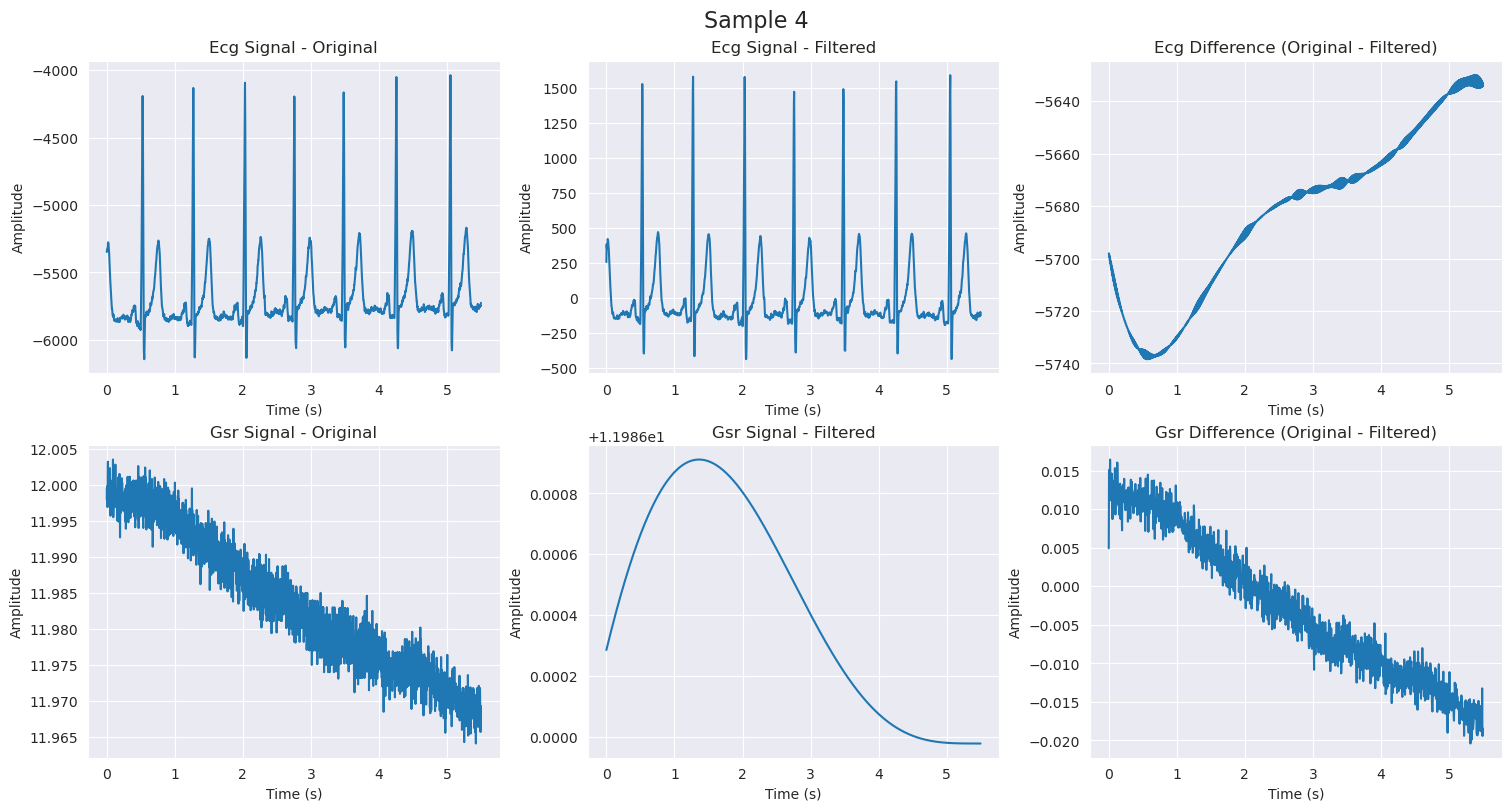

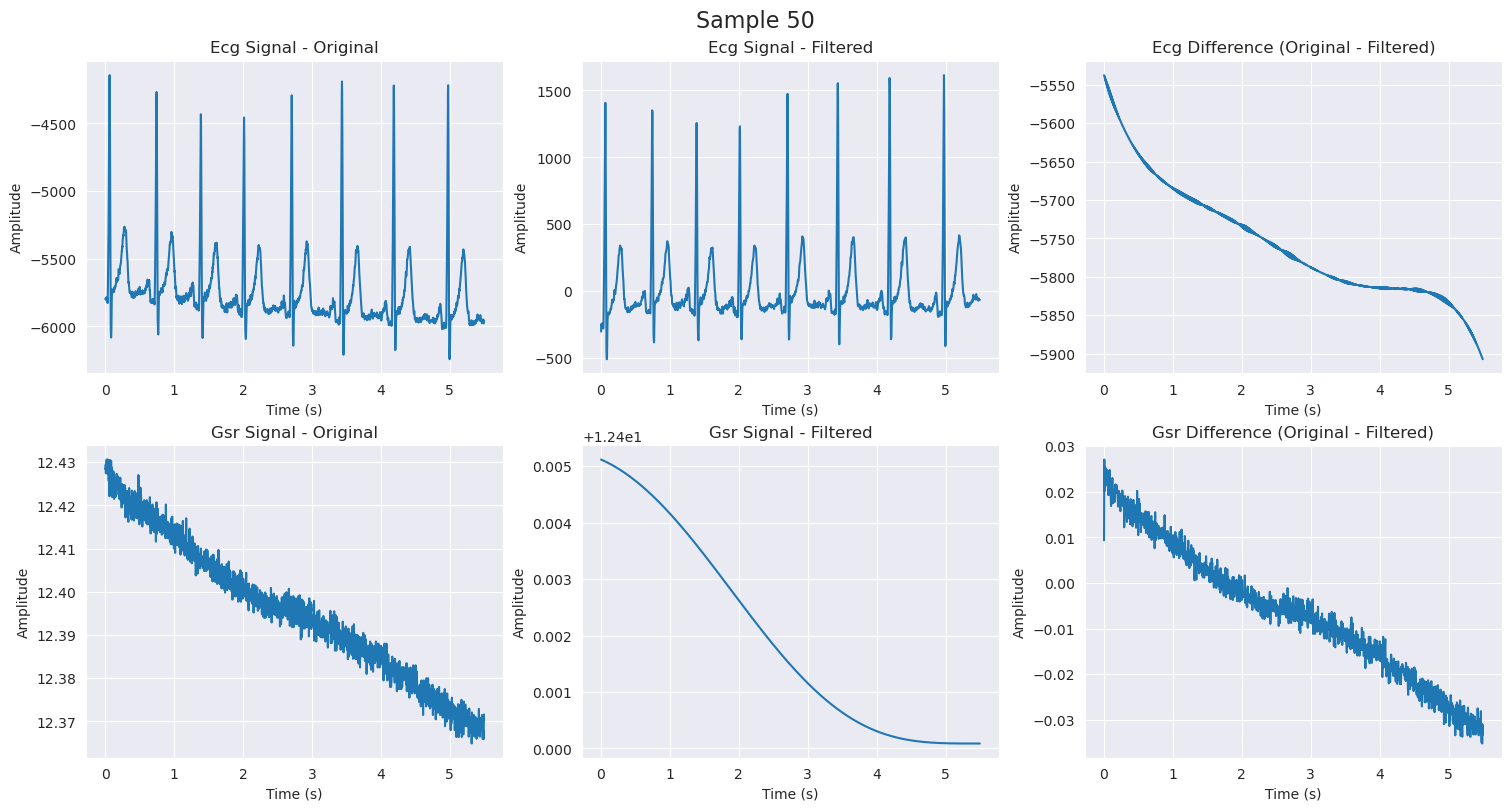

In [6]:
plot_signal_samples(data, data_filtered, [4, 50], 512, 256) 

In [10]:
X, y = create_input_space(data_filtered)

X-Shape: (8600, 1408, 2)
y-Shape: (8600,)


In [11]:
def class_balance(y):
    unique, counts = np.unique(y, return_counts=True)
    class_balance = dict(zip(unique, counts))
    
    print("Class Balance:")
    for class_label, count in class_balance.items():
        print(f"Class {class_label}: {count} samples")

In [12]:
class_balance(y)

Class Balance:
Class 0: 1720 samples
Class 1: 1720 samples
Class 2: 1720 samples
Class 3: 1720 samples
Class 4: 1720 samples


In [13]:
augmented_X, augmented_y = augment_data(X, y)

Augmented X.shape: (77400, 1152, 2)
Augmented y.shape: (77400,)


In [14]:
class_balance(augmented_y)

Class Balance:
Class 0: 43000 samples
Class 1: 8600 samples
Class 2: 8600 samples
Class 3: 8600 samples
Class 4: 8600 samples
